In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, BatchNormalization, Flatten, Dense
from tensorflow.nn import relu, sigmoid
import matplotlib.pyplot as plt

In [2]:
x = [ [ [i + j] for i in range(5)] for j in range(100_000) ]
y = [i+5 for i in range(100_000)]

In [3]:
x = np.array(x)
y = np.array(y)
x = x / 100_000
y = y / 100_000
print(x.shape, y.shape)

(100000, 5, 1) (100000,)


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
model = Sequential()

model.add(LSTM(64, input_shape=(5,1), activation=relu, return_sequences=True))

model.add(LSTM(128, activation=relu, return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(64, activation=relu, return_sequences=True))
model.add(BatchNormalization())

model.add(LSTM(64, activation=relu, return_sequences=False))
model.add(Dropout(0.2))

model.add(Flatten())dsi
model.add(Dense(1, activation=sigmoid))

In [6]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [7]:
model.fit(x_train, y_train, epochs=10, batch_size=16, validation_data=(x_test, y_test))

Epoch 1/10
5000/5000 [==============================] - 49s 10ms/step - loss: 0.5024 - accuracy: 1.2500e-05 - val_loss: 0.5106 - val_accuracy: 0.0000e+00
Epoch 2/10
5000/5000 [==============================] - 46s 9ms/step - loss: 0.5001 - accuracy: 1.2500e-05 - val_loss: 0.5142 - val_accuracy: 0.0000e+00
Epoch 3/10
5000/5000 [==============================] - 50s 10ms/step - loss: 0.4999 - accuracy: 1.2500e-05 - val_loss: 0.5123 - val_accuracy: 0.0000e+00
Epoch 4/10
5000/5000 [==============================] - 46s 9ms/step - loss: 0.4998 - accuracy: 1.2500e-05 - val_loss: 0.5117 - val_accuracy: 0.0000e+00
Epoch 5/10
5000/5000 [==============================] - 49s 10ms/step - loss: 0.4997 - accuracy: 1.2500e-05 - val_loss: 0.5115 - val_accuracy: 0.0000e+00
Epoch 6/10
5000/5000 [==============================] - 44s 9ms/step - loss: 0.4997 - accuracy: 1.2500e-05 - val_loss: 0.5109 - val_accuracy: 0.0000e+00
Epoch 7/10
5000/5000 [==============================] - 45s 9ms/step - loss: 0.

In [8]:
pred = model.predict(x_test[:20])

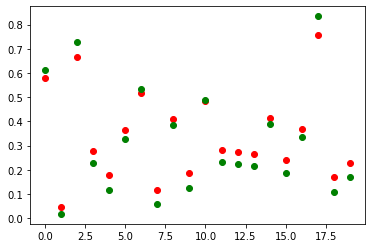

In [9]:
plt.scatter(range(20), pred, color="r")
plt.scatter(range(20), y_test[:20], color="g")
plt.show()